# Logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
import itertools
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)

## Data Visualization

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


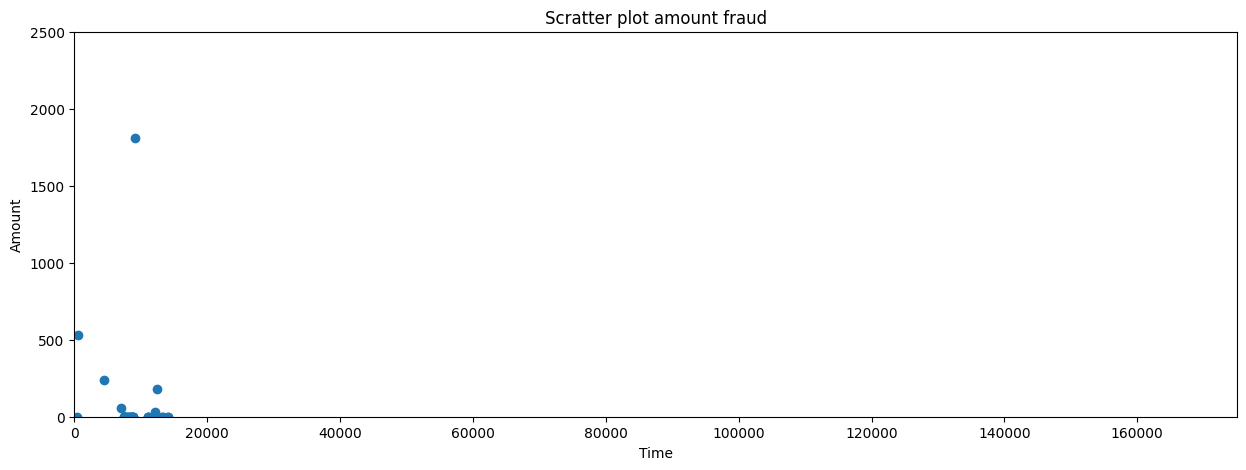

In [8]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [9]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 1 frauds where the amount was bigger than 1000 over 38 frauds


## Unbalanced Data

In [10]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 38  frauds in the original dataset, even though there are 9926 no frauds in the dataset.


In [11]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


## Correlation of the features

In [12]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

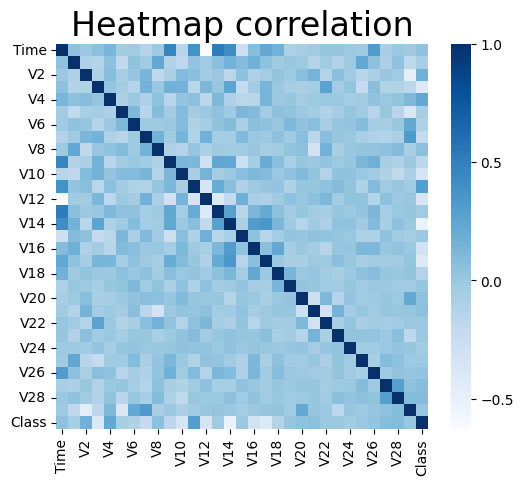

In [13]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

### UNDERSAMPLING

In [14]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We divide the original dataset in two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 38 frauds so we need to take a similar number of non-fraud


<ipython-input-14-cc3b99d3a482>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


In [15]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [16]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

## Fucntion for Confusion Matrix

In [17]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [18]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Applying Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression()

In [21]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print(classifier.intercept_, classifier.coef_)

[-6.62017719] [[-4.71937806e-01 -4.31032886e-01 -4.35887573e-01  5.47967790e-01
  -9.13533112e-03 -1.40486758e-01  2.92099569e-01 -1.25048224e-01
  -6.23799616e-01 -5.31802223e-01  1.46876500e-02 -5.23541358e-01
  -3.51918986e-01 -7.31301765e-01  3.43489321e-01  3.30676744e-02
  -5.03202856e-01  1.84918787e-01 -1.95723690e-01  1.50268737e-01
   2.31995153e-01  2.96143208e-01  5.24335214e-01 -2.47429127e-01
   1.13214806e-01 -1.72066332e-01 -1.48588740e-01  1.53636780e-02
  -6.45845810e-04]]


In [23]:
pred = classifier.predict(X_train)

In [24]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


### Confusion Matrix

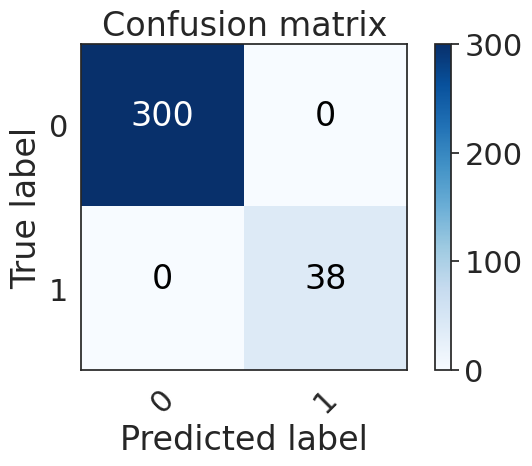

In [27]:
import itertools
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [29]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338



In [30]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.0 
Mean Absolute Percentage error : nan
Mean Squared Error : 0.0
R Squared Error: 1.0


<ipython-input-30-5f72e4baadad>:2: RuntimeWarning: invalid value encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


# Undersampling using Synthetic Minority Oversampling Technique (SMOTE) approach

In [31]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train= oversample.fit_resample(X_train,y_train)

## Applying Logistic Regression

In [32]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
print(classifier.intercept_, classifier.coef_)

[-6.81870355] [[-0.70160878 -0.48623618 -0.47769166  0.62744033  0.19811857 -0.06971889
   0.27686262 -0.20019278 -0.44145847 -0.6162816   0.26834021 -0.73942729
  -0.39769631 -0.75560657  0.51677917  0.15165701 -0.71136201  0.25560467
  -0.18664534  0.03207178  0.19177596  0.27586738  0.60452921 -0.29027116
   0.21208589 -0.13851566 -0.14470089 -0.05166224 -0.00102399]]


In [34]:
pred = classifier.predict(X_train)

In [35]:
print ('Accuracy from sk-learn after applying SMOTE: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn after applying SMOTE: 1.0


## Confusion Matrix

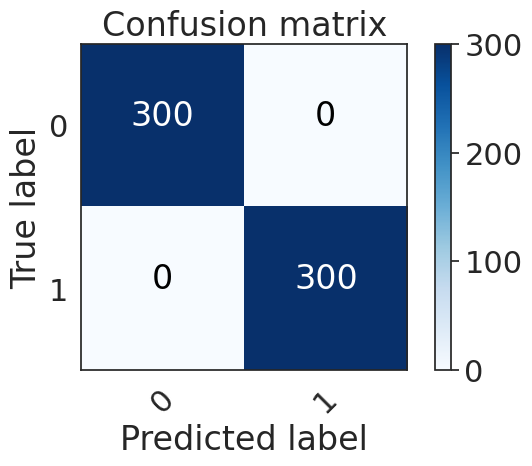

In [36]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [37]:
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300
         1.0       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [38]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.0 
Mean Absolute Percentage error : nan
Mean Squared Error : 0.0
R Squared Error: 1.0


<ipython-input-38-5f72e4baadad>:2: RuntimeWarning: invalid value encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


## Testing Error

In [39]:
pred = classifier.predict(X_test_all)

ValueError: ignored

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test_all,y_test_all)))

### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred)
print(report)

In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))
mse= mean_squared_error(y_test_all,pred)
r_squared_error = r2_score(y_test_all,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

## Hyperparameter Tuning

In [ ]:
classifier_b = LogisticRegression(class_weight={0:0.6,1:0.4})

In [ ]:
classifier_b.fit(X_train,y_train)

In [ ]:
pred_b = classifier_b.predict(X_test_all)

In [ ]:
print(classifier_b.intercept_, classifier_b.coef_)

In [ ]:
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_b.score(X_test_all,y_test_all)))

### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_all, pred_b)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_test_all,pred_b)
print(report)

In [ ]:
mean_abs_error = mean_absolute_error(y_test_all,pred_b)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
mse= mean_squared_error(y_test_all,pred_b)
r_squared_error = r2_score(y_test_all,pred_b)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))